In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import layers
import tensorflow as tf
import datetime


In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import random

In [2]:
#rm -rf ./logs/

In [3]:
data = pd.read_csv("H:/CODE/Machine_Learning/DataSet/uni/Newfolder/maglev_datasetleast.csv");
data.head()

,current,postion
0,3.750646,0.500000
1,3.750646,0.506442
2,3.750646,0.525258
3,3.750646,0.555481
4,3.750646,0.595958


In [4]:
data.describe()

,current,postion
count,4001.000000,4001.000000
mean,1.631608,2.798653
std,1.362216,1.415714
min,-0.923630,0.000276
25%,0.513822,1.620016
50%,1.577559,2.877447
75%,2.974105,3.881415
max,3.950413,6.189851


Text(0, 0.5, 'postion')

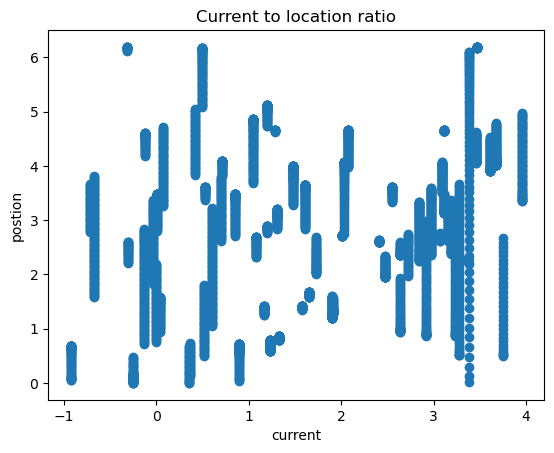

In [40]:
plt.scatter(data["current"],data['postion'])
plt.title("Current to location ratio")
plt.xlabel('current')
plt.ylabel('postion')

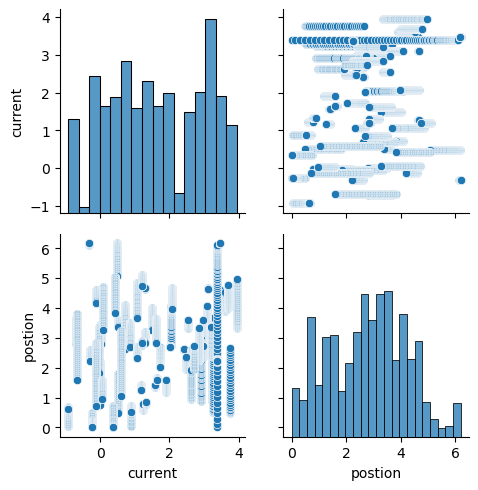

In [27]:
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [5]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled, columns=data.columns)

scaled_data.describe()

,current,postion
count,4001.000000,4001.000000
mean,0.524254,0.452111
std,0.279484,0.228725
min,0.000000,0.000000
25%,0.294920,0.261688
50%,0.513165,0.464841
75%,0.799692,0.627044
max,1.000000,1.000000


In [6]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [7]:
def create_sequences(input_data, target_column, sequence_length=1, flatten=False):
    inputs = []
    targets = []
    data_size = len(input_data)
    
    for i in range(data_size-sequence_length):
        sequence = input_data[i:i+sequence_length]
        #print(type(sequence))
        label_position = i + sequence_length
        label = input_data[label_position][target_column]
        if flatten:
            inputs.append(sequence.flatten())
        else:
            inputs.append(sequence)
        targets.append(label)
        
    return np.array(inputs), np.array(targets)

In [71]:
x, y = create_sequences(scaled_data.to_numpy(), 1, 3, flatten=True)
x.shape, y.shape

((3998, 6), (3998,))

Our sytem has two inputs x and y (y is considered also an input) and we user 3 past values therefore the neural network has input 2x3=6

In [72]:
split_ratio = 0.25
split = int(len(x) * split_ratio)

x_train, x_valid = x[:-split], x[-split:]
y_train, y_valid = y[:-split], y[-split:]

In [212]:
narx_model = keras.Sequential([
    layers.Dense(10, activation='tanh',input_shape=(x.shape[1],)),
    layers.Dense(1, activation='relu')
])

narx_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics='mae'
)


log_dir = "H:/CODE/Machine_Learning/DataSet/uni/Newfolder/"
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [213]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = narx_model.fit(x,y, epochs=100, validation_split=0.3, verbose=1, callbacks=[callback])


Epoch 1/100
88/88 [==============================] - 1s 4ms/step - loss: 0.2760 - mae: 0.4665 - val_loss: 0.2075 - val_mae: 0.4071
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.0535 - mae: 0.1688 - val_loss: 0.0076 - val_mae: 0.0751
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0352 - val_loss: 5.8075e-04 - val_mae: 0.0199
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 7.3818e-04 - mae: 0.0159 - val_loss: 3.5440e-04 - val_mae: 0.0119
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 6.3124e-04 - mae: 0.0147 - val_loss: 2.9643e-04 - val_mae: 0.0101
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 5.9474e-04 - mae: 0.0145 - val_loss: 2.5712e-04 - val_mae: 0.0091
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 5.5710e-04 - mae: 0.0142 - val_loss: 2.4019e-04 - val_mae: 0.0089
Epoch 8/100
88/88 [============================

Text(0.5, 0, 'epoch')

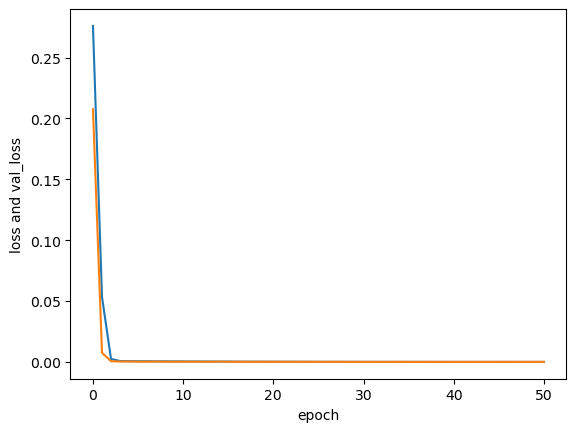

In [214]:
history.history['loss']

import matplotlib as mpl

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("loss and val_loss")
plt.xlabel("epoch")

In [215]:
num100 = [random.randint(1, 100) for n in range(69)]

Text(0, 0.5, '')

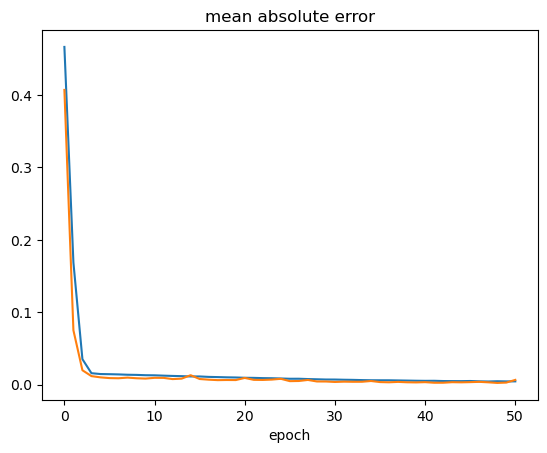

In [216]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mean absolute error')
plt.ylabel("mae and val_mae")
plt.xlabel("epoch")


In [217]:
history.history


{'loss': [0.27604129910469055,
  0.053524505347013474,
  0.0025060551706701517,
  0.0007381797186098993,
  0.0006312391487881541,
  0.0005947394529357553,
  0.0005571030778810382,
  0.0005229534581303596,
  0.0004909022245556116,
  0.00045331750879995525,
  0.000426927930675447,
  0.00038959342055022717,
  0.0003633833257481456,
  0.0003364604781381786,
  0.0003104558272752911,
  0.0002933702489826828,
  0.0002659238816704601,
  0.0002426475693937391,
  0.00022627534053754061,
  0.00021132812253199518,
  0.00019563331443350762,
  0.00018307969730813056,
  0.00016562275413889438,
  0.00016132772725541145,
  0.00014530283806379884,
  0.00013360839511733502,
  0.00013069853594060987,
  0.00011718309542629868,
  0.00010707723413361236,
  9.879926801659167e-05,
  9.545857756165788e-05,
  9.098383452510461e-05,
  8.436812640866265e-05,
  7.783406181260943e-05,
  7.470682612620294e-05,
  7.180140528362244e-05,
  7.178437226684764e-05,
  6.834045052528381e-05,
  6.455700349761173e-05,
  5.9753

In [218]:
predicted = narx_model(x)


Text(0, 0.5, 'target')

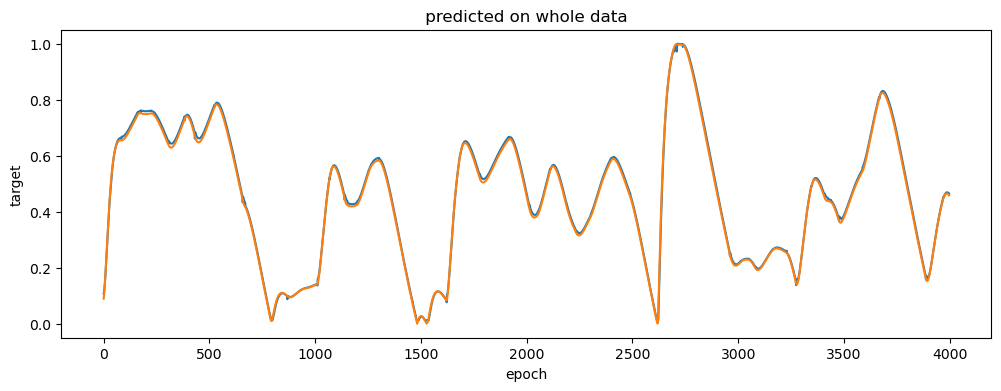

In [219]:
plt.figure(figsize=(12, 4))
plt.plot(predicted)
plt.plot(y)
plt.title(" predicted on whole data ")
plt.xlabel("epoch")
plt.ylabel("target")

In [222]:
# Calculate correlation coefficient
correlation_coef = np.corrcoef(y, predicted)

# Create a scatter plot
plt.scatter(x, y, label=f'Correlation = {correlation_coef:.2f}')
plt.title('Scatter Plot with Correlation Coefficient')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()
plt.grid(True)
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3998 and the array at index 1 has size 1

In [201]:
narx_model.evaluate(x,y)

125/125 [==============================] - 0s 1ms/step - loss: 0.2569 - mae: 0.4524


[0.25689443945884705, 0.45238879323005676]

In [202]:
narx_model.save('narx_model')

INFO:tensorflow:Assets written to: narx_model\assets


INFO:tensorflow:Assets written to: narx_model\assets


In [203]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 22680), started 3:16:35 ago. (Use '!kill 22680' to kill it.)

In [19]:
%tensorboard --logdir 

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2024-01-01 09:34:04.313118: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
   